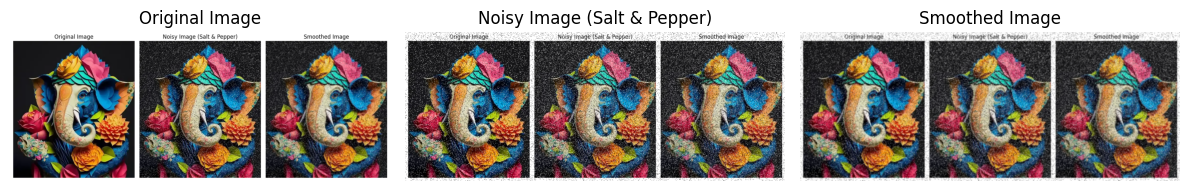

In [4]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """
    Add salt and pepper noise to an image.

    Parameters:
    - image: Input image (numpy array).
    - salt_prob: Probability of adding salt noise.
    - pepper_prob: Probability of adding pepper noise.

    Returns:
    - Noisy image (numpy array).
    """
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255  # Salt noise (white)

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0  # Pepper noise (black)

    return noisy_image

def smooth_image(image, kernel_size=5):
    """
    Apply a smoothing filter to an image.

    Parameters:
    - image: Input image (numpy array).
    - kernel_size: Size of the smoothing kernel.

    Returns:
    - Smoothed image (numpy array).
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Load an image
image_path = '/content/sample_data/exp2a.jpeg'  # Replace with your image path
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Add salt and pepper noise to the image
noisy_image = add_salt_and_pepper_noise(original_image, salt_prob=0.02, pepper_prob=0.02)

# Smooth the noisy image
smoothed_image = smooth_image(noisy_image, kernel_size=5)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Noisy Image (Salt & Pepper)')
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Smoothed Image')
plt.imshow(smoothed_image)
plt.axis('off')

plt.tight_layout()
plt.show()